In [1]:
!pip install datasets


  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.6 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 607.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/547.8 kB ? eta -:--:--
   ---- ----------------------------------- 61.4/547.8 kB 1.7 MB/s eta 0:00:01
   -------- ------------------------------- 112.6/547.8 kB 1.3 MB/s eta 0:00:01
   ----------- ---------------------------- 153.6/547.8 kB 1.1 MB/s eta 0:00:01
   -------------- ------------------------- 204.8/547.8 kB 1.1 MB/s eta 0:00:01
   -------------------- ------------------- 276.5/547.8 kB 1.1 MB/s eta 0:00:01
   ----------------------- ---------------- 317.4/547.8 kB 1.2 MB/s eta 0:00:01
   -------------------------- ------------- 368.6/547.8 kB 1.1 MB/s eta 0:00:01
   ------------------------------ --------- 419.8/547.8 kB 1.1 MB/s eta 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install py7z

   ---------------------------------------- 0.0/67.9 kB ? eta -:--:--
   ------------------ --------------------- 30.7/67.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 67.9/67.9 kB 739.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/357.3 kB ? eta -:--:--
   ------ --------------------------------- 61.4/357.3 kB 1.7 MB/s eta 0:00:01
   ----------- ---------------------------- 102.4/357.3 kB 1.5 MB/s eta 0:00:01
   ----------------- ---------------------- 153.6/357.3 kB 1.3 MB/s eta 0:00:01
   ---------------------- ----------------- 204.8/357.3 kB 1.1 MB/s eta 0:00:01
   ------------------------------ --------- 276.5/357.3 kB 1.2 MB/s eta 0:00:01
   ----------------------------------- ---- 317.4/357.3 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 357.3/357.3 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.8 MB 1.9 MB/s eta 0:00:


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from datasets import load_dataset

# Load the SAMSum dataset
samsum = load_dataset('samsum',trust_remote_code=True)

# Check the keys available in the dataset
print(samsum)

# Access the train, validation, and test splits
train_data = samsum['train']
validation_data = samsum['validation']
test_data = samsum['test']

# Print some example data
print("\nSample from the training set:")
print(train_data[0])


Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

Sample from the training set:
{'id': '13818513', 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)", 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}


In [6]:
# Print a sample dialogue and its summary
sample = train_data[0]
dialogue = sample['dialogue']
summary = sample['summary']

print("\nDialogue:")
print(dialogue)

print("\nSummary:")
print(summary)



Dialogue:
Amanda: I baked  cookies. Do you want some?
Jerry: Sure!
Amanda: I'll bring you tomorrow :-)

Summary:
Amanda baked cookies and will bring Jerry some tomorrow.


In [9]:
# Calculate basic statistics
num_train_samples = len(train_data)
num_validation_samples = len(validation_data)
num_test_samples = len(test_data)

print(f"Number of Training Samples: {num_train_samples}")
print(f"Number of Validation Samples: {num_validation_samples}")
print(f"Number of Test Samples: {num_test_samples}")

# Analyze dialogue and summary lengths using list comprehensions
train_dialogue_lengths = [len(dialogue.split()) for dialogue in train_data['dialogue']]
train_summary_lengths = [len(summary.split()) for summary in train_data['summary']]

average_dialogue_length = sum(train_dialogue_lengths) / num_train_samples
average_summary_length = sum(train_summary_lengths) / num_train_samples

print(f"Average Dialogue Length: {average_dialogue_length:.2f} words")
print(f"Average Summary Length: {average_summary_length:.2f} words")

# Check the range of lengths
min_dialogue_length = min(train_dialogue_lengths)
max_dialogue_length = max(train_dialogue_lengths)
min_summary_length = min(train_summary_lengths)
max_summary_length = max(train_summary_lengths)

print(f"Dialogue Length Range: {min_dialogue_length} - {max_dialogue_length} words")
print(f"Summary Length Range: {min_summary_length} - {max_summary_length} words")


Number of Training Samples: 14732
Number of Validation Samples: 818
Number of Test Samples: 819
Average Dialogue Length: 93.79 words
Average Summary Length: 20.32 words
Dialogue Length Range: 0 - 803 words
Summary Length Range: 1 - 64 words


c:\Users\Behram Khan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


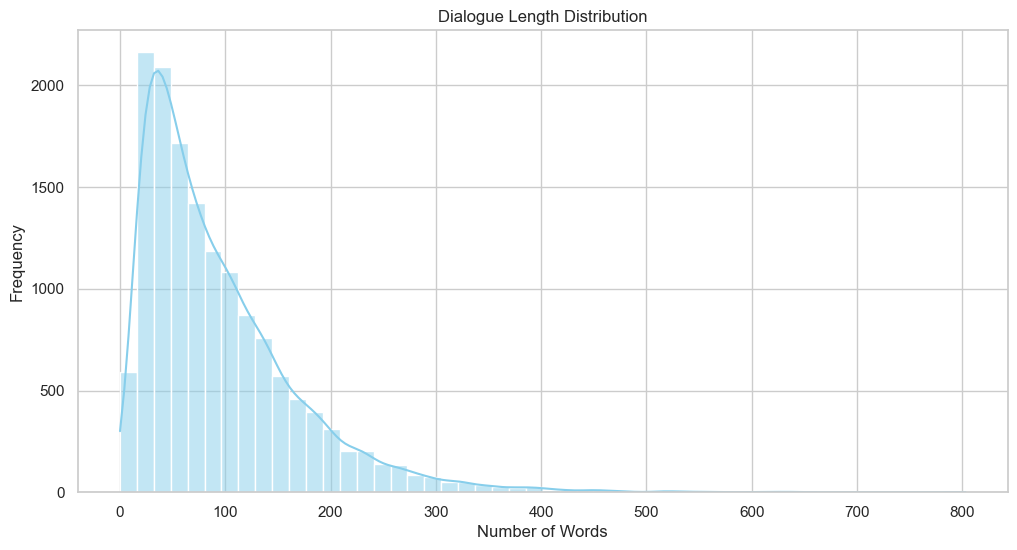

c:\Users\Behram Khan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


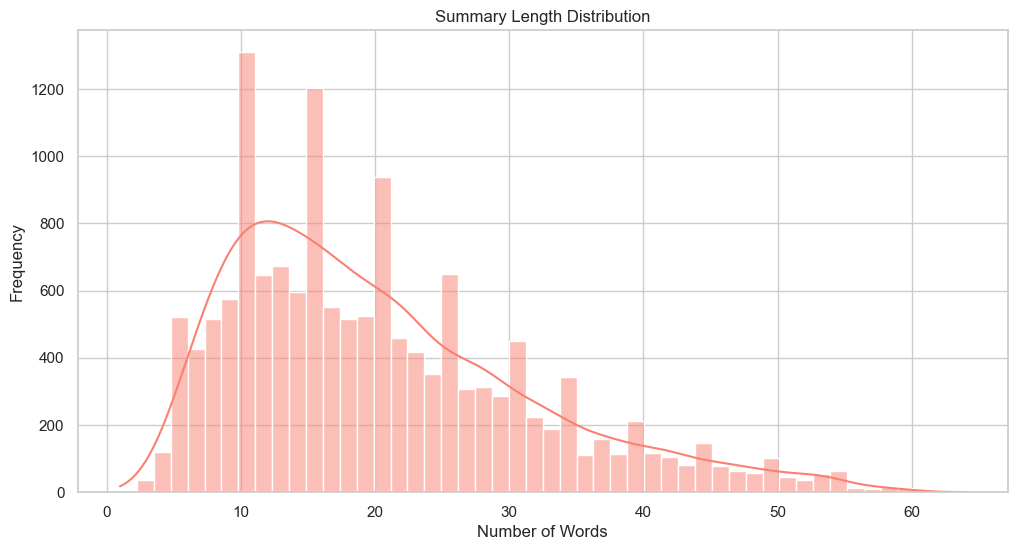

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot dialogue length distribution
plt.figure(figsize=(12, 6))
sns.histplot(train_dialogue_lengths, bins=50, color='skyblue', kde=True)
plt.title("Dialogue Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Plot summary length distribution
plt.figure(figsize=(12, 6))
sns.histplot(train_summary_lengths, bins=50, color='salmon', kde=True)
plt.title("Summary Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [12]:
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords
nltk.download('stopwords')

# Calculate word frequencies
dialogue_words = [word for text in train_data['dialogue'] for word in text.split()]
summary_words = [word for text in train_data['summary'] for word in text.split()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
dialogue_words_filtered = [word for word in dialogue_words if word.lower() not in stop_words]
summary_words_filtered = [word for word in summary_words if word.lower() not in stop_words]

# Count word frequencies
dialogue_word_counts = Counter(dialogue_words_filtered)
summary_word_counts = Counter(summary_words_filtered)

# Display top 10 most common words
print("\nTop 10 Most Common Words in Dialogues:")
print(dialogue_word_counts.most_common(10))

print("\nTop 10 Most Common Words in Summaries:")
print(summary_word_counts.most_common(10))


[nltk_data] Downloading package stopwords to C:\Users\Behram
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Top 10 Most Common Words in Dialogues:
[("I'm", 7066), ('know', 5404), ('like', 5141), (':)', 4041), ('think', 3980), ("I'll", 3709), ('get', 3580), ('go', 3296), ('see', 3151), ('need', 2977)]

Top 10 Most Common Words in Summaries:
[('going', 1740), ('wants', 1258), ('go', 1175), ('meet', 975), ('new', 858), ('come', 673), ('buy', 650), ('it.', 648), ('needs', 585), ('get', 581)]


In [13]:
import spacy

# Load the English model from spaCy
nlp = spacy.load('en_core_web_sm')

# Sample 500 dialogues for entity analysis
sample_dialogues = train_data['dialogue'][:500]
entities = []

# Extract named entities
for dialogue in sample_dialogues:
    doc = nlp(dialogue)
    entities.extend([ent.text for ent in doc.ents])

# Count entity frequencies
entity_counts = Counter(entities)

# Display the top 10 entities
print("\nTop 10 Named Entities in Dialogues:")
print(entity_counts.most_common(10))



Top 10 Named Entities in Dialogues:
[('Tom', 75), ('John', 65), ('Sam', 61), ('today', 56), ('Mary', 56), ('Kate', 47), ('Ben', 45), ('Mike', 44), ('Jeff', 43), ('Daniel', 43)]


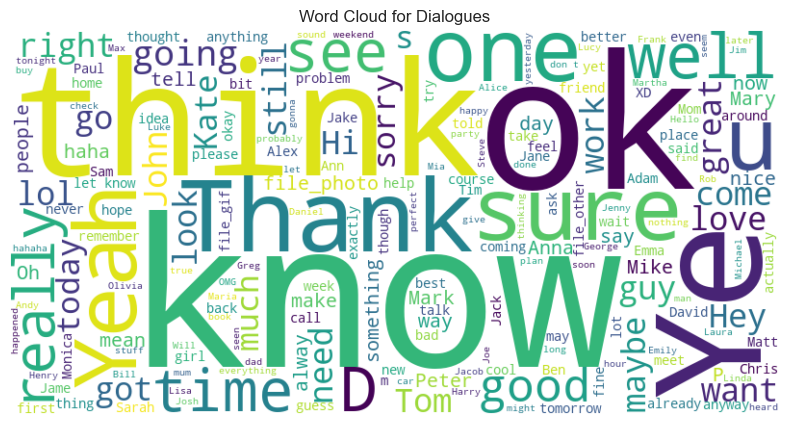

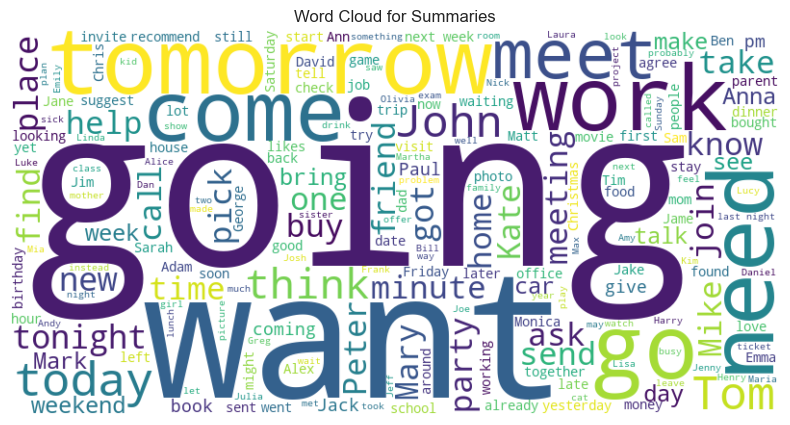

In [14]:
from wordcloud import WordCloud

# Generate word cloud for dialogues
dialogue_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(dialogue_words_filtered))

# Generate word cloud for summaries
summary_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(summary_words_filtered))

# Plot word cloud for dialogues
plt.figure(figsize=(10, 5))
plt.imshow(dialogue_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Dialogues")
plt.axis('off')
plt.show()

# Plot word cloud for summaries
plt.figure(figsize=(10, 5))
plt.imshow(summary_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Summaries")
plt.axis('off')
plt.show()


In [15]:
# Function to display samples
def display_samples(dataset, num_samples=5):
    for i in range(num_samples):
        print(f"Sample {i+1}")
        print("Dialogue:")
        print(dataset['dialogue'][i])
        print("Summary:")
        print(dataset['summary'][i])
        print("\n" + "="*80 + "\n")

# Display 3 samples from the training dataset
display_samples(train_data, num_samples=3)


Sample 1
Dialogue:
Amanda: I baked  cookies. Do you want some?
Jerry: Sure!
Amanda: I'll bring you tomorrow :-)
Summary:
Amanda baked cookies and will bring Jerry some tomorrow.


Sample 2
Dialogue:
Olivia: Who are you voting for in this election? 
Oliver: Liberals as always.
Olivia: Me too!!
Oliver: Great
Summary:
Olivia and Olivier are voting for liberals in this election. 


Sample 3
Dialogue:
Tim: Hi, what's up?
Kim: Bad mood tbh, I was going to do lots of stuff but ended up procrastinating
Tim: What did you plan on doing?
Kim: Oh you know, uni stuff and unfucking my room
Kim: Maybe tomorrow I'll move my ass and do everything
Kim: We were going to defrost a fridge so instead of shopping I'll eat some defrosted veggies
Tim: For doing stuff I recommend Pomodoro technique where u use breaks for doing chores
Tim: It really helps
Kim: thanks, maybe I'll do that
Tim: I also like using post-its in kaban style
Summary:
Kim may try the pomodoro technique recommended by Tim to get more stuff

In [20]:
!pip install transformers


     ---------------------------------------- 0.0/43.7 kB ? eta -:--:--
     ----------------- -------------------- 20.5/43.7 kB 682.7 kB/s eta 0:00:01
     -------------------------------------- 43.7/43.7 kB 428.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.5 MB 1.7 MB/s eta 0:00:06
    --------------------------------------- 0.1/9.5 MB 1.4 MB/s eta 0:00:07
    --------------------------------------- 0.2/9.5 MB 1.3 MB/s eta 0:00:08
    --------------------------------------- 0.2/9.5 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.3/9.5 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.4/9.5 MB 1.2 MB/s eta 0:00:08
   - -------------------------------------- 0.4/9.5 MB 1.2 MB/s eta 0:00:08
   - -------------------------------------- 0.4/9.5 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.5/9.5 MB 1.2 MB/s eta 0:00:08
   - ----------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from transformers import TFAutoModelForSeq2SeqLM, AutoTokenizer
# Define a function to preprocess text

# Load a tokenizer for the model
tokenizer = AutoTokenizer.from_pretrained('t5-small')


# Tokenize dialogues and summaries
def tokenize(batch):
    # Tokenize dialogues
    inputs = tokenizer(batch['dialogue'], padding='max_length', truncation=True, max_length=512, return_tensors='tf')
    # Tokenize summaries
    labels = tokenizer(batch['summary'], padding='max_length', truncation=True, max_length=128, return_tensors='tf')
    
    # Convert tensors to numpy arrays for the dataset
    return {
        'input_ids': inputs['input_ids'].numpy(),
        'attention_mask': inputs['attention_mask'].numpy(),
        'labels': labels['input_ids'].numpy()
    }


# Load the SAMSum dataset
samsum = load_dataset('samsum')

# Define a function to preprocess text
def preprocess_text(text):
    return text.strip()

# Apply preprocessing to dialogue and summary
samsum = samsum.map(lambda example: {
    'dialogue': preprocess_text(example['dialogue']),
    'summary': preprocess_text(example['summary'])
})

# Apply tokenization
tokenized_samsum = samsum.map(tokenize, batched=True, batch_size=16)

# Split dataset into train, validation, and test
train_data = tokenized_samsum['train']
validation_data = tokenized_samsum['validation']
test_data = tokenized_samsum['test']

# Check the preprocessed data
print(train_data[0])


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

c:\Users\Behram Khan\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Behram Khan\.cache\huggingface\hub\models--t5-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

{'id': '13818513', 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)", 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.', 'input_ids': [21542, 10, 27, 13635, 5081, 5, 531, 25, 241, 128, 58, 16637, 10, 10625, 55, 21542, 10, 27, 31, 195, 830, 25, 5721, 3, 10, 18, 61, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [29]:
!pip install evaluate

   ---------------------------------------- 0.0/84.1 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/84.1 kB ? eta -:--:--
   ------------------- -------------------- 41.0/84.1 kB 487.6 kB/s eta 0:00:01
   ---------------------------------------- 84.1/84.1 kB 786.1 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from transformers import TrainingArguments, Trainer
import evaluate

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    save_steps=500,
    save_total_limit=3,
    load_best_model_at_end=True,
    metric_for_best_model='rougeL',
    predict_with_generate=True
)


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'predict_with_generate'

In [26]:
from transformers import TFAutoModelForSeq2SeqLM, AutoTokenizer

# Load the model
model = TFAutoModelForSeq2SeqLM.from_pretrained('t5-small')


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

RuntimeError: Failed to import transformers.models.t5.modeling_tf_t5 because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.

In [ ]:
from transformers import TFTrainingArguments, TFTrainer
import evaluate

# Define training arguments
training_args = TFTrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    save_steps=500,
    save_total_limit=3,
    load_best_model_at_end=True,
    metric_for_best_model='rougeL',
    predict_with_generate=True
)


In [33]:
from transformers import TrainingArguments, Trainer
import evaluate

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',    # Evaluate at the end of each epoch
    save_strategy='epoch',          # Save model at the end of each epoch
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    save_total_limit=3,
    load_best_model_at_end=True,
    metric_for_best_model='rougeL'
)


RuntimeError: Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.